# SVM를 이용한 한국인 메이저리거 현지 평가 분석

# 1. 개요
 - SVM을 이용하여 메이저리거 현지 여론 학습
 - 한국인 메이저리거 여론을 평가하기 위해 트위터 게시물 검색
 - 학습된 분류기를 이용하여 긍정적인 여론이면 1, 비판적인 여론이면 0으로 분류
 
# 2. 연구방법
 - 베이지안 분류기 테스트에서 사용된 데이터 사용
 - 한계 : 한국 이름과 미국 이름 쓰는 방식의 차이에서 오는 문제점 (예: 박병호 - Byungho, Byungho park, park, etc.. 주로 twins - park 을 많이 쓰지만 park 으로 검색시 원하지않는 결과 검색)
 - 수정 : 1. 한국인 메이저리거 트윗 뿐만 아니라 전체 메이저리거의 긍정적인 여론과 부정적인 여론 총 300개 수집 후 분류기 학습
 - 1.한국인 메이저리거 트윗을 따로 모아서 평가
 - 2.긍정적인 트윗이면 1, 비판적인 트윗이면 0
 - SVM을 사용했을 때의 성능과 베이지안을 사용했을 때의 성능을 비교
 
# 3. 데이터
 
- 베이지안 분류기를 사용한 평가 분석기 실험에서 사용된 데이터와 동일한 데이터 사용
- 4월까지 좋은 성적을 거두고 있는 선수, 좋지 않은 성적을 거두고 있는 선수를 검색하여 트윗 300개 저장
- 긍정적인 트윗과 부정적인 트윗의 숫자는 150개씩 저장. (사전확률 0.5)
- 선수 검색의 경우 트윗에서 여러번 등장할 수 있기 때문에 긍정 혹은 비판적인 여론과 관계 없이 선수 이름 제거 후 저장
 
# 4. 분류기 학습 및 테스트
- 트위터 -> 단어 벡터로 변경 (split() 함수 사용)
- 중복되지만 의미없는 단어들 제거 (선수 이름, I, a etc..)
- 해쉬태그 제거 
- 수집한 데이터를 사용하여 학습 후, 한국인 메이저 리거 트위터를 분류기에 넣어서 평가
- Twitter API를 사용하여 바로 평가하려 했으나 위에서 언급한 해쉬 태그 검색에서의 문제점을 이유로 한국인 메이저리거 트윗을 따로 저장하여 document 벡터 저장
 ## 4.1 베이지안 분류기와 SVM의 실험 방법 차이
    - 베이지안 분류기의 경우 명목적 데이터와 연속적 데이터 모두 사용 가능한 분류기
    - 본 실험은 명목적 데이터이기 때문에 이전 실험에서는 문제없이 단어들의 등장 확률을 구하여 실험 진행
    - SVM은 연속적 데이터에서 사용 가능한 분류기
    - 이 때문에 명목적인 데이터에서 의미있는 연속적인 데이터를 추출하여야 함
    - 즉, 명목적인 데이터에서 feature vector를 추출하여야 함
    - 본 실험에서는 하나의 트윗(하나의 문장)에서 x1 = 부정적인 단어의 출현 갯수, x2 = 긍정적인 단어의 출현 갯수인 feature vector x를 추출하여 실험한다.
- 최종적으로 SVM을 사용했을 때의 에러율과 베이지안을 사용하였을 때의 에러율을 비교한다.
- 추가로 Linear regression을 사용하였을 때 와의 정확도도 같이 비교한다. (시간이 되면.. 추가로 진행)

# 5. 실험

 ## 5.1 데이터 로드 & 해쉬태그 제거
    * 해쉬 태그 제거 후 문장 -> 단어 변환 후 2차원 리스트에 저장
    * 긍정적인 트윗 = 1 부정적인 트윗 = 2 classVec에 저장

In [6]:
import re

tw = []
classVec = []
DocList = []
regEx = re.compile('\\W*')

file =open('data\\Twit.txt')
for i in file.readlines():
    tw.append(i)
idx = len(tw)

file =open('data\\ClassVec.txt')
for i in file.readlines():
    classVec.append(i.rstrip('\n'))
    
for i in range(idx):
    temp = regEx.split(tw[i])
    DocList.append(temp)

print classVec
print DocList

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
[['', 'Power', 'pitching', 'ball', '94mph', 'strike', 'out', 'oh', 'seunghwanoh', 'cardinals', 'stlouis', ''], ['', 'Cardinals', 'Korean', 'reliever', 'SeungHwanOh', 'throws', 'another', 'perfect', 'inning', 'http', 'www', 'koreatimesus', 'com', 'cardinals', 'oh', 'seung', 'hwan', 'throws', 'perfect', 'inning', 'in', 'relief', 'MLB', ''], ['For', 'the', 'life', 'of', 'me', 'I', 'have', 'tried', 'to', 'come', 'up', 'with', 'a', 'new', 'nickname', 'for', 'Seung', 'Hwan', 'Oh', 'I', 'can', 't', 'think', 'of', 'anything', 'good', ''], ['Stunning',

 ## 5.2 의미 없는 단어 제거
    * 선수이름, 팀이름, etc..

In [7]:
Excepwordlist = ["seunghwanoh",'seung', 'hwan',"cardinals","stlouis","manny","machado", "orioles","mlb",
                "park","twins","maeda","kenta","dodgers","la","ladodgers","debut","hyunsookim",
                "kim","hyun","soo","baltimore","korean","tyler","colins","tigers",
                 "tylercollins","keuchel","houstonastros","giants","jepsen","braves",
                "cubs","redSox","greinke","puig","molina","detroitTigers","a","an","the",
                "for","by","and","of","or","to","is","are","has","have","about","i","you",
                "he","they",'']

for i in range(idx):
    t = []
    for word in DocList[i]:
        word = word.upper().lower()
        if word not in Excepwordlist:
            t.append(word)
   
    DocList[i] = t

print DocList

[['power', 'pitching', 'ball', '94mph', 'strike', 'out', 'oh'], ['reliever', 'throws', 'another', 'perfect', 'inning', 'http', 'www', 'koreatimesus', 'com', 'oh', 'throws', 'perfect', 'inning', 'in', 'relief'], ['life', 'me', 'tried', 'come', 'up', 'with', 'new', 'nickname', 'oh', 'can', 't', 'think', 'anything', 'good'], ['stunning', 'work', 'from', 'galleryelenash', 'londonartfair', 'from', 'his', 'impermanence', 'series', 'allmatterwilldecay'], ['best', 'fantasy', 'baseball', 'player', 'trey', 'rose', 'aka', 'dynasty_digest', 'http', 'www', 'dobberbaseball', 'com', 'best', 'fantasy', 'baseball', 'player', 'trout', 'harper'], ['off', 'hot', 'start', 'do', 'think', 'll', 'be', 'allstar', 'http', 'fb', 'me', '5nt5zf7pc'], ['freak', 'nature', 'dude', 'guy', 'just', 'makes', 'plays', 'that', 'no', 'one', 'else', 'would', 'dream', 'platinumglove', 'mannybeingmanny'], ['hey', 'birdland', 'let', 's', 'just', 'use', 'this', 'as', 'excuse', 'bask', 'in', 'glory', 'that', 'our', 'third', 'base

 ## 5.3 특징벡터 추출 (x1 = 부정적인 단어의 출현 갯수, x2 = 긍정적인 단어의 출현 갯수)
  ### 5.3.1 각 단어 마다 트윗에서 출현 빈도 추출
   * 각 단어마다 긍정적인 트윗, 부정적인 트윗에서 출현하는 빈도 추출하는 코드 작성
   * countWord 함수 작성
     

In [70]:
import bayes
from numpy import *
reload(bayes)

def countWord(trainMatrix,trainCategory):
    numTrainDocs=len(trainMatrix)
    numWords=len(trainMatrix[0])
    p0Num=ones(numWords);p1Num=ones(numWords)
    
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
        else:
            p0Num+=trainMatrix[i]
    
    return p0Num,p1Num

myVocabList = bayes.createVocabList(DocList)
  
trainMat=[]
int_classVec = []
for postinDoc in DocList:
    trainMat.append(bayes.setOfWords2Vec(myVocabList, postinDoc))
 
for str_class in classVec:
    int_class = int(str_class)
    int_classVec.append(int_class)


Negative_vector,Positive_vector = countWord(trainMat,int_classVec)


* 각 단어의 비판적인 글 출현 빈도

In [9]:
for i in range(len(myVocabList)):
    print myVocabList[i], Negative_vector[i]

inning 1.0
all 4.0
minors 3.0
go 4.0
gl 1.0
hate 2.0
carpet 2.0
pedro 1.0
tv 2.0
gostros 2.0
0 2.0
fly 2.0
far 2.0
choice 1.0
fan 1.0
fall 2.0
cool 2.0
did 3.0
p 1.0
team 3.0
guy 1.0
sfgiants 2.0
schoop 1.0
enjoy 1.0
force 1.0
instagram 1.0
japanese 1.0
sign 1.0
video 1.0
cigars 2.0
even 2.0
what 2.0
plays 1.0
pathetic 2.0
giving 1.0
lights 2.0
18kentamaeda 1.0
goes 1.0
new 2.0
chavezravine 1.0
ever 3.0
can 4.0
here 2.0
baseball 5.0
100 2.0
boy 2.0
great 1.0
didnt 1.0
bos 2.0
36 1.0
pick 2.0
pice 2.0
aka 1.0
makes 1.0
love 1.0
win 2.0
sundayfunday 2.0
ibackthebirds 1.0
everybody 2.0
use 1.0
from 2.0
composure 1.0
dude 1.0
baez 1.0
sports 2.0
live 2.0
pitching 1.0
strike 1.0
today 2.0
more 1.0
holy 3.0
dynasty_digest 1.0
baseman 1.0
excuse 1.0
istilllovethem 2.0
dodgersvspadres 1.0
glad 2.0
me 3.0
anything 1.0
f 3.0
dobberbaseball 1.0
work 1.0
soup 2.0
era 1.0
my 1.0
could 1.0
streak 2.0
give 3.0
awesome 1.0
dodgerblue 1.0
dugouts 1.0
fuck 6.0
accept 2.0
want 3.0
offense 2.0
needs 1.0
s

* 각 단어의 긍정적인 글 출현 빈도

In [11]:
for i in range(len(myVocabList)):
    print myVocabList[i], Positive_vector[i]

inning 3.0
all 1.0
minors 1.0
go 3.0
gl 2.0
hate 1.0
carpet 1.0
pedro 2.0
tv 1.0
gostros 1.0
0 3.0
fly 1.0
far 1.0
choice 2.0
fan 2.0
fall 1.0
cool 1.0
did 1.0
p 3.0
team 2.0
guy 3.0
sfgiants 1.0
schoop 2.0
enjoy 2.0
force 2.0
instagram 3.0
japanese 2.0
sign 2.0
video 2.0
cigars 1.0
even 1.0
what 1.0
plays 2.0
pathetic 1.0
giving 2.0
lights 1.0
18kentamaeda 2.0
goes 2.0
new 3.0
chavezravine 2.0
ever 1.0
can 5.0
here 1.0
baseball 6.0
100 1.0
boy 1.0
great 4.0
didnt 2.0
bos 1.0
36 2.0
pick 1.0
pice 1.0
aka 2.0
makes 3.0
love 4.0
win 3.0
sundayfunday 1.0
ibackthebirds 2.0
everybody 1.0
use 2.0
from 2.0
composure 2.0
dude 2.0
baez 2.0
sports 1.0
live 1.0
pitching 2.0
strike 2.0
today 1.0
more 2.0
holy 1.0
dynasty_digest 2.0
baseman 2.0
excuse 2.0
istilllovethem 1.0
dodgersvspadres 2.0
glad 1.0
me 5.0
anything 2.0
f 1.0
dobberbaseball 2.0
work 2.0
soup 1.0
era 2.0
my 2.0
could 2.0
streak 1.0
give 2.0
awesome 2.0
dodgerblue 2.0
dugouts 2.0
fuck 1.0
accept 1.0
want 1.0
offense 1.0
needs 2.0
s

  ### 5.3.2 DocList -> X (Feature Vector) 로 변환
   * Document내의 단어들이 긍정,부정 트윗에서 등장하는 전체 출현빈도 계산
   * getAppearanceFreq 함수 작성

In [55]:
def getAppearanceFreq(Neg_V,Pos_V,Doc):
    N_sum = 0
    P_sum = 0
    for i in range(len(Doc)):
        if Doc[i]==1:
            N_sum = N_sum + Neg_V[i]
            P_sum = P_sum + Pos_V[i]
    
    x = [N_sum,P_sum]
    return x

x_List = []

for i in range(len(DocList)):
    Mat = bayes.setOfWords2Vec(myVocabList,DocList[i])
    x_List.append(getAppearanceFreq(Negative_vector,Positive_vector,Mat))
    
print x_List

[[13.0, 21.0], [22.0, 44.0], [35.0, 49.0], [14.0, 21.0], [19.0, 48.0], [25.0, 40.0], [27.0, 43.0], [47.0, 54.0], [12.0, 14.0], [9.0, 26.0], [6.0, 17.0], [31.0, 31.0], [15.0, 20.0], [21.0, 26.0], [19.0, 32.0], [28.0, 46.0], [3.0, 11.0], [25.0, 42.0], [1.0, 2.0], [13.0, 16.0], [1.0, 3.0], [8.0, 12.0], [20.0, 37.0], [2.0, 3.0], [6.0, 6.0], [10.0, 21.0], [25.0, 45.0], [6.0, 10.0], [20.0, 35.0], [24.0, 40.0], [16.0, 28.0], [29.0, 38.0], [13.0, 26.0], [20.0, 33.0], [21.0, 36.0], [28.0, 48.0], [14.0, 34.0], [14.0, 26.0], [14.0, 22.0], [5.0, 9.0], [28.0, 31.0], [13.0, 18.0], [25.0, 41.0], [31.0, 40.0], [14.0, 29.0], [27.0, 43.0], [15.0, 38.0], [20.0, 28.0], [32.0, 40.0], [42.0, 53.0], [45.0, 31.0], [52.0, 31.0], [57.0, 38.0], [38.0, 15.0], [11.0, 7.0], [13.0, 8.0], [40.0, 19.0], [65.0, 30.0], [51.0, 31.0], [32.0, 16.0], [36.0, 22.0], [54.0, 25.0], [46.0, 26.0], [49.0, 29.0], [39.0, 16.0], [31.0, 20.0], [58.0, 32.0], [41.0, 18.0], [30.0, 13.0], [54.0, 24.0], [64.0, 44.0], [32.0, 16.0], [29.0, 1

  * red - 부정적인 트윗, green - 긍정적인 트윗

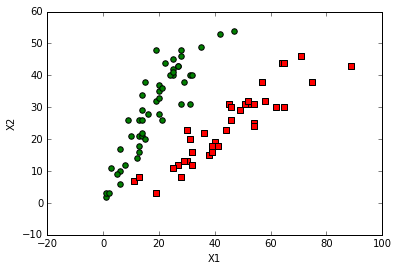

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

for i in range(len(int_classVec)):
    if int_classVec[i] == 0:
        xcord1.append(x_List[i][0]); ycord1.append(x_List[i][1])
    else:
        xcord2.append(x_List[i][0]); ycord2.append(x_List[i][1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')
plt.xlabel('X1'); plt.ylabel('X2');
plt.show()

 ## 5.4 SVM 분류기 학습
  - 학습과 테스트를 위해 label 0 -> -1로 변경 (부정적인 글 0 -> 부정적인 글 -1)

In [65]:
import svmMLiA as svm
reload(svmMLiA)

dataArr = x_List
labelArr = int_classVec

for i in range(len(labelArr)):
    if labelArr[i] == 0:
        labelArr[i] = -1

b, alphas = svm.smoP(dataArr, labelArr, 0.6, 0.001, 100)

print b
print alphas[alphas>0]

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 2
fullSet, iter: 0 i:2, pairs changed 3
fullSet, iter: 0 i:3, pairs changed 4
fullSet, iter: 0 i:4, pairs changed 4
j not moving enough
fullSet, iter: 0 i:5, pairs changed 4
j not moving enough
fullSet, iter: 0 i:6, pairs changed 4
fullSet, iter: 0 i:7, pairs changed 5
L==H
fullSet, iter: 0 i:8, pairs changed 5
fullSet, iter: 0 i:9, pairs changed 5
fullSet, iter: 0 i:10, pairs changed 5
L==H
fullSet, iter: 0 i:11, pairs changed 5
L==H
fullSet, iter: 0 i:12, pairs changed 5
L==H
fullSet, iter: 0 i:13, pairs changed 5
fullSet, iter: 0 i:14, pairs changed 5
fullSet, iter: 0 i:15, pairs changed 5
L==H
fullSet, iter: 0 i:16, pairs changed 5
fullSet, iter: 0 i:17, pairs changed 5
L==H
fullSet, iter: 0 i:18, pairs changed 5
L==H
fullSet, iter: 0 i:19, pairs changed 5
L==H
fullSet, iter: 0 i:20, pairs changed 5
L==H
fullSet, iter: 0 i:21, pairs changed 5
fullSet, iter: 0 i:22, pairs changed 5
L==H
fullSet, iter: 0 i:23, 

In [47]:
ws=svm.calcWs(alphas,dataArr,labelArr)
print ws

[[-0.10090541]
 [ 0.10162974]]


In [66]:
k1 = 1.3
datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
svInd=nonzero(alphas.A>0)[0]
sVs=datMat[svInd] #get matrix of only support vectors
labelSV = labelMat[svInd];
print "there are %d Support Vectors" % shape(sVs)[0]
m,n = shape(datMat)
errorCount = 0
for i in range(m):
    kernelEval = svm.kernelTrans(sVs,datMat[i,:],('rbf', k1))
    predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
    if sign(predict)!=sign(labelArr[i]): errorCount += 1
print "the training error rate is: %f" % (float(errorCount)/m)

there are 12 Support Vectors
the training error rate is: 0.444444


### 5.4.1 testRbf 함수 변경
 - 함수 내부에서 testset을 로드 하는 부분을 파라미터로 넘기는 방식으로 변경

In [77]:
def testRbf_modify(dataArr,labelArr):
    k1 = 1.3
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = svm.kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m) 

 ## 5.5 SVM 분류기 테스트

In [78]:
file =open('data\\validation_Twit.txt')

testDoc=[]
testDocList=[]
test_x = []
regEx = re.compile('\\W*')

for i in file.readlines():
    testDoc.append(i)
    
for i in range(len(testDoc)):
    temp = regEx.split(testDoc[i])
    testDocList.append(temp)    
               
testClassVec = [-1,-1,1,1,1,1,1,1,1,1]

for i in range(len(testDocList)):
    Mat = bayes.setOfWords2Vec(myVocabList,testDocList[i])
    test_x.append(getAppearanceFreq(Negative_vector,Positive_vector,Mat))
    
testRbf_modify(test_x,testClassVec)

the test error rate is: 0.200000


# 6. 결론 및 토론

- 베이지안 분류기를 사용하였을 때 에러율 0.2
- 베이지안 분류기를 사용하였을 때의 한계
    - 한국인 선수에 대한 트윗 부족
    - 테스트케이스가 부족하여 일반화 하기 어려움
- SVM을 사용하였을 때의 에러율 0.2
- 베이지안과 에러율이 같으나 베이지안 분류기를 사용하였을 때와 마찬가지로 테스트 케이스가 부족
- 두 분류기를 비교하기 위해서는 더 많은 데이터를 가지고 실험할 필요가 있음
- 또한 SVM에서 사용한 특징벡터인 x1(부정적인 단어의 출현갯수),x2(긍정적인 단어의 출현갯수)를 사용하였을 경우 두 클래스를 나누는 svm 결정 직선은 x2/x1 즉, 긍정적인 단어의 출현갯수에 따른 부정적인 단어의 출현갯수의 비율이 됨
- 이것은 문장에서 긍적 혹은 부정적인 단어가 나타나는 확률을 비교하는것과 크게 다르지 않아 보임
- svm을 사용하였을때 다른 feature set을 추출 하는 것도 검토할 필요성이 있어보임
- 결론적으로는 svm과 베이지안 분류기가 똑같은 에러율을 보였으나 테스트 케이스가 많이 부족하기 때문에 어느게 더 낫다 혹은 두 분류기의 성능은 비슷하다 단정 짓기 어려우며 svm으로 변경하기 위해 추출한 feature vector도 변경할 필요성이 있어보임